# Minigrad Demo

In [1]:
import csv
import matplotlib.pyplot as plt
import random

import neural
from value import Value

#### First, we load the dataset into arrays.

The final value is the price of the wine, and we load this into our Y array.
The rest of them are data that we will use to predict the rating, we load these into our X array.

In [2]:
# Load dataset

def load_data(file_name):
    result_x = []
    result_y = []
    with open(file_name) as file:
        reader = csv.reader(file)
        next(reader)

        for row in reader:
            x = []
            y = []

            for i in range(len(row)):
                if i == 2:
                    if row[i] == 'Yes':
                        x.append(1)
                    else:
                        x.append(0)
                elif i == len(row)-1:
                    y.append(float(row[i]))
                else:
                    x.append(float(row[i]))
            
            result_x.append(x)
            result_y.append(y)
    
    return result_x, result_y

X, Y = load_data('datasets/Student_Performance.csv')

In [3]:
# Print the size and first 5 elements of dataset
print(len(X))
for i in range(5): print(X[i], Y[i])

10000
[7.0, 99.0, 1, 9.0, 1.0] [91.0]
[4.0, 82.0, 0, 4.0, 2.0] [65.0]
[8.0, 51.0, 1, 7.0, 2.0] [45.0]
[5.0, 52.0, 1, 5.0, 2.0] [36.0]
[7.0, 75.0, 0, 8.0, 5.0] [66.0]


#### Architecture

We use multilayer perceptron with an input size of 5 and output size of 1, for each input feature and the single score output.
Each hidden layer will have a relu activation, and the output will be linear

The network will output a float value, and we will use it to find the predicted score.

In [4]:
mlp = neural.MLP(input_size=5, layer_sizes=[8, 4, 1], seed=None, inner_activation='leaky_relu', final_activation='linear')
print(mlp)

MLP(input_size=5, layer_sizes=[8, 4, 1])


In [5]:
# Get the parameters

param = mlp.parameters()
print(param[:5])
print(len(param))

[Value(data=-0.16147894160259169, grad=0), Value(data=-0.4974134996507569, grad=0), Value(data=-0.4657671886842014, grad=0), Value(data=0.5937181484331033, grad=0), Value(data=-0.399287584794906, grad=0)]
89


Before we train our MLP, we will split the dataset into training and test sets, so we can evaluate the performance after running gradient descent

In [6]:
# Split data

train, test = neural.train_test_split(list(zip(X, Y)), 0.8, shuffle=False)

X_train = [i[0] for i in train]
Y_train = [i[1] for i in train]

X_test = [i[0] for i in test]
Y_test = [i[1] for i in test]

print(len(X_train), len(Y_test))
for i in range(5): print(X_train[i], Y_train[i])

8000 2000
[7.0, 99.0, 1, 9.0, 1.0] [91.0]
[4.0, 82.0, 0, 4.0, 2.0] [65.0]
[8.0, 51.0, 1, 7.0, 2.0] [45.0]
[5.0, 52.0, 1, 5.0, 2.0] [36.0]
[7.0, 75.0, 0, 8.0, 5.0] [66.0]


In [7]:
# For graphing purposes
cost_history = []

iterations = 500
learning_rate = 0.000001
lambda_ = 0.01
batch_size = 1000

for i in range(iterations):
    if batch_size != 0:
        random.seed()
        random.shuffle(train)
        X_batch = [train[i][0] for i in range(batch_size)]
        Y_batch = [train[i][1] for i in range(batch_size)]
    else:
        X_batch = X_train[:100]
        Y_batch = Y_train[:100]

    cost = mlp.cost(X_batch, Y_batch, lambda_)  
    cost.backward()

    if i%5 == 0:
        print(i, cost)
        cost_history.append(cost)
    
    alpha = learning_rate

    for p in param:
        p.data -= alpha*p.grad

0 Value(data=1079.7103258726954, grad=1)
5 Value(data=989.4224499135677, grad=1)
10 Value(data=912.271186588564, grad=1)
15 Value(data=856.8114423039627, grad=1)
20 Value(data=772.1133306866533, grad=1)
25 Value(data=686.8645746902774, grad=1)
30 Value(data=645.2758419014528, grad=1)
35 Value(data=595.7813012672033, grad=1)
40 Value(data=558.6898505311931, grad=1)
45 Value(data=484.7865676258934, grad=1)
50 Value(data=461.05366400137274, grad=1)
55 Value(data=417.79764158216585, grad=1)
60 Value(data=369.1555813121909, grad=1)
65 Value(data=334.3599161230482, grad=1)
70 Value(data=313.64404091586704, grad=1)
75 Value(data=275.4170454096623, grad=1)
80 Value(data=255.61765163855412, grad=1)
85 Value(data=233.83445706861937, grad=1)
90 Value(data=211.55274463722716, grad=1)
95 Value(data=187.24547311586426, grad=1)
100 Value(data=172.48930593801018, grad=1)
105 Value(data=162.4285865460589, grad=1)
110 Value(data=145.8178834218655, grad=1)
115 Value(data=130.98604487495808, grad=1)
120 V

In [8]:
predictions = mlp(X_test)
print(mlp.cost(X_test, Y_test))
for i in range(50): print(predictions[i], Y_test[i])
cost_history = [c.data for c in cost_history]

Value(data=41.31156845568952, grad=0)
[Value(data=42.53666175182636, grad=0)] [28.0]
[Value(data=38.553351611525144, grad=0)] [35.0]
[Value(data=61.15384643716196, grad=0)] [63.0]
[Value(data=71.37685378930527, grad=0)] [71.0]
[Value(data=70.0096869097885, grad=0)] [78.0]
[Value(data=34.161743713895646, grad=0)] [32.0]
[Value(data=26.196191584113112, grad=0)] [40.0]
[Value(data=53.83597717489381, grad=0)] [55.0]
[Value(data=45.15677398846526, grad=0)] [42.0]
[Value(data=74.68417304438005, grad=0)] [88.0]
[Value(data=41.7962973050105, grad=0)] [43.0]
[Value(data=59.969965839071826, grad=0)] [66.0]
[Value(data=42.576156703424026, grad=0)] [33.0]
[Value(data=33.051643394352844, grad=0)] [12.0]
[Value(data=30.372172778448835, grad=0)] [32.0]
[Value(data=62.681618786751265, grad=0)] [48.0]
[Value(data=38.73634032327866, grad=0)] [56.0]
[Value(data=79.02653242730517, grad=0)] [73.0]
[Value(data=71.71913541988201, grad=0)] [65.0]
[Value(data=71.58249805690316, grad=0)] [83.0]
[Value(data=67.3

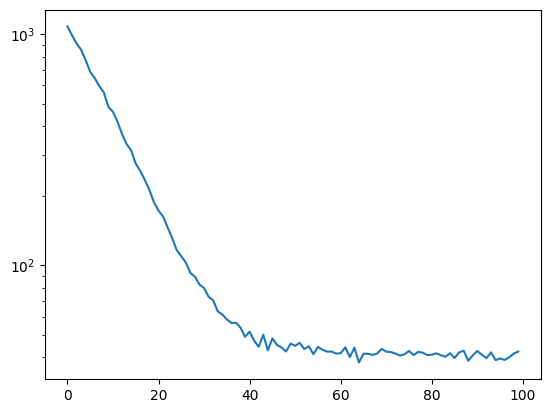

In [9]:
# Graph cost over time

plt.plot(cost_history)
plt.yscale('log')